# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | waingapu
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | hami
Processing Record 6 of Set 1 | nadym
Processing Record 7 of Set 1 | vorgashor
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | christchurch
Processing Record 10 of Set 1 | broken hill
Processing Record 11 of Set 1 | gamba
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | harstad
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | kapa'a
Processing Record 16 of Set 1 | bowen
Processing Record 17 of Set 1 | cherdyn'
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | praia
Processin

In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          605
Lat           605
Lng           605
Max Temp      605
Humidity      605
Cloudiness    605
Wind Speed    605
Country       605
Date          605
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,256.88,66,0,2.06,US,1706647312
1,atafu village,-8.5421,-172.5159,302.27,71,67,2.80,TK,1706647312
2,waingapu,-9.6567,120.2641,298.12,84,53,2.35,ID,1706647312
3,bethel,41.3712,-73.4140,275.38,67,100,1.54,US,1706647157
4,hami,42.8000,93.4500,268.60,53,100,2.54,CN,1706647312


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,256.88,66,0,2.06,US,1706647312
1,atafu village,-8.5421,-172.5159,302.27,71,67,2.80,TK,1706647312
2,waingapu,-9.6567,120.2641,298.12,84,53,2.35,ID,1706647312
3,bethel,41.3712,-73.4140,275.38,67,100,1.54,US,1706647157
4,hami,42.8000,93.4500,268.60,53,100,2.54,CN,1706647312


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

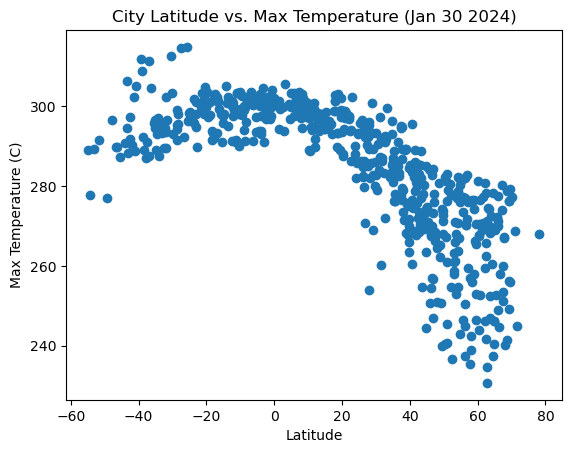

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (Jan 30 2024)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

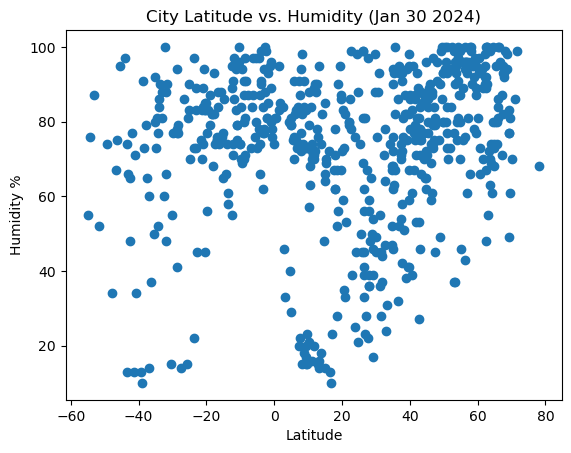

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity (Jan 30 2024)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

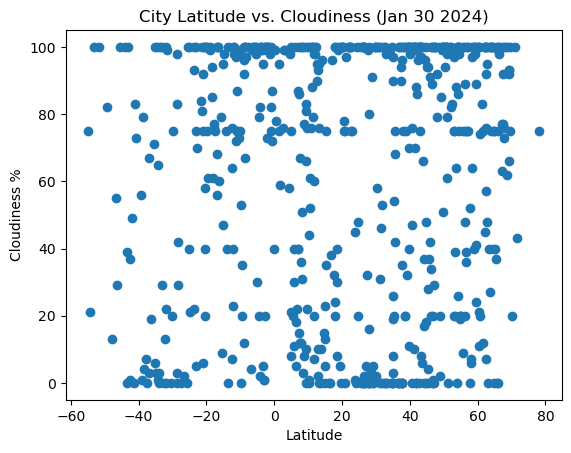

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs. Cloudiness (Jan 30 2024)")


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

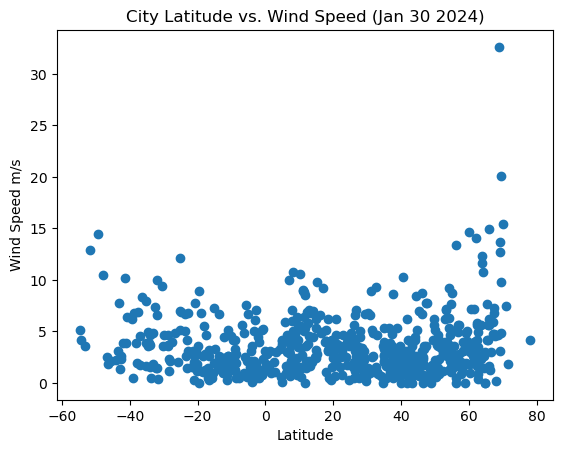

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s")
plt.title("City Latitude vs. Wind Speed (Jan 30 2024)")


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def plotLinReg(x, y, title = "Linear Regression", xlabel = "predictor" , ylabel = "output", xyloc= (1,1)):
    
    #run regression on given data
    [slope, intercept, r_value, p_value, std_err] = linregress(x, y)
    regline = slope*x + intercept

    #create the scatter plot of data
    plt.scatter(x = x, y = y, color = "green")

    #create the line plot of the regression analysis and include forumala on graph
    plt.plot(x, regline, color = "red")
    plt.annotate(text = f"y = {round(slope,3)}x + {round(intercept,3)}", color = "red", xy = xyloc)

    #create labels and titles for graph
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    #print the r value
    print(f"The r value is {r_value}")

    #show graph
    plt.show()


In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,256.88,66,0,2.06,US,1706647312
3,bethel,41.3712,-73.4140,275.38,67,100,1.54,US,1706647157
4,hami,42.8000,93.4500,268.60,53,100,2.54,CN,1706647312
5,nadym,65.5333,72.5167,252.60,95,37,7.70,RU,1706647313
6,vorgashor,67.5833,63.9500,260.00,95,100,4.74,RU,1706647313


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atafu village,-8.5421,-172.5159,302.27,71,67,2.80,TK,1706647312
2,waingapu,-9.6567,120.2641,298.12,84,53,2.35,ID,1706647312
8,christchurch,-43.5333,172.6333,294.49,74,39,3.09,NZ,1706647273
9,broken hill,-31.9500,141.4333,289.59,48,0,10.02,AU,1706647024
10,gamba,-2.6500,10.0000,299.29,88,100,1.81,GA,1706647313


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.8033833644169038


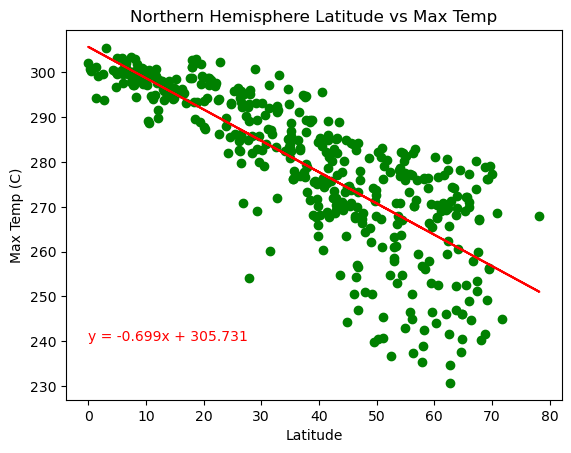

In [48]:
# Linear regression on Northern Hemisphere
plotLinReg(x = northern_hemi_df["Lat"], y = northern_hemi_df["Max Temp"], title = "Northern Hemisphere Latitude vs Max Temp", xlabel = "Latitude", ylabel = "Max Temp (C)", xyloc= (0, 240))

The r value is 0.35134649030622


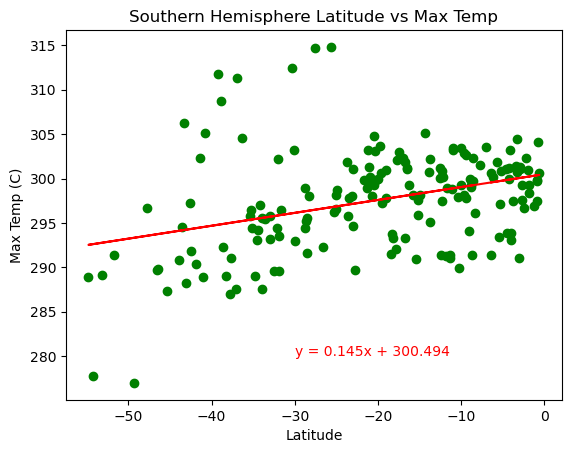

In [50]:
# Linear regression on Southern Hemisphere
plotLinReg(x = southern_hemi_df["Lat"], y = southern_hemi_df["Max Temp"], title = "Southern Hemisphere Latitude vs Max Temp", xlabel = "Latitude", ylabel = "Max Temp (C)", xyloc= (-30, 280))

**Discussion about the linear relationship:** 
The relationship between Latitude and Max Temperature in the Northern Hemisphere has a strong negative correlation. Whereas the same relationship in the Southern Hemisphere has a small positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.3804980457360335


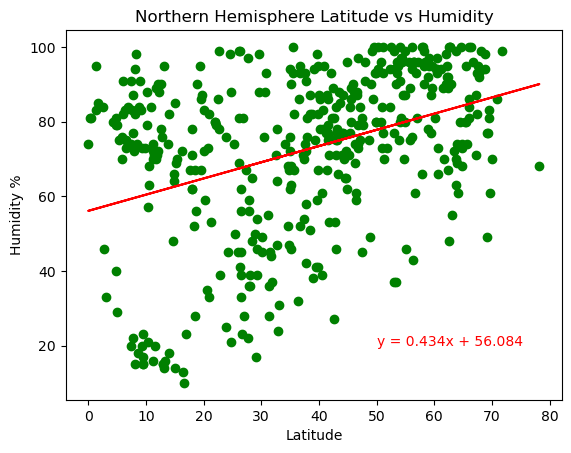

In [52]:
# Northern Hemisphere
plotLinReg(x = northern_hemi_df["Lat"], y = northern_hemi_df["Humidity"], title = "Northern Hemisphere Latitude vs Humidity", xlabel = "Latitude", ylabel = "Humidity %", xyloc= (50, 20))

The r value is 0.41026220067258945


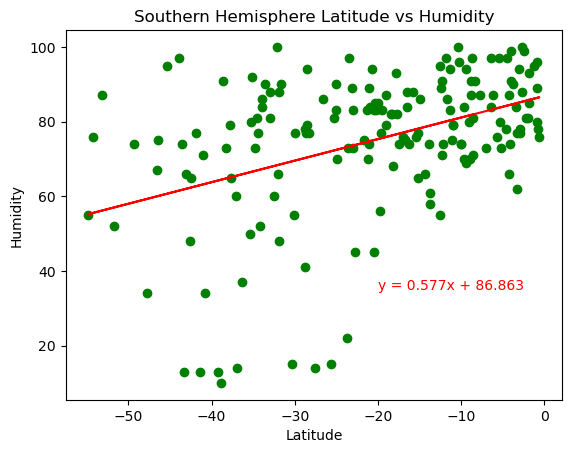

In [54]:
# Southern Hemisphere
plotLinReg(x = southern_hemi_df["Lat"], y = southern_hemi_df["Humidity"], title = "Southern Hemisphere Latitude vs Humidity", xlabel = "Latitude", ylabel = "Humidity", xyloc= (-20, 35))

**Discussion about the linear relationship:** 
The Humidity in the Southern and Northern Hemispheres both have small positive correlation's with Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.14765998416670512


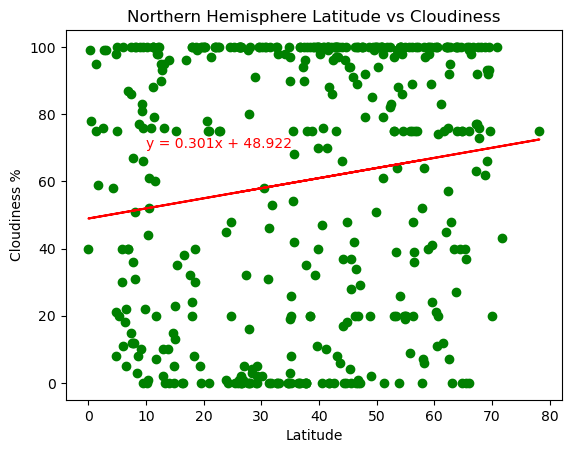

In [56]:
# Northern Hemisphere
plotLinReg(x = northern_hemi_df["Lat"], y = northern_hemi_df["Cloudiness"], title = "Northern Hemisphere Latitude vs Cloudiness", xlabel = "Latitude", ylabel = "Cloudiness %", xyloc= (10, 70))

The r value is 0.2879649077307914


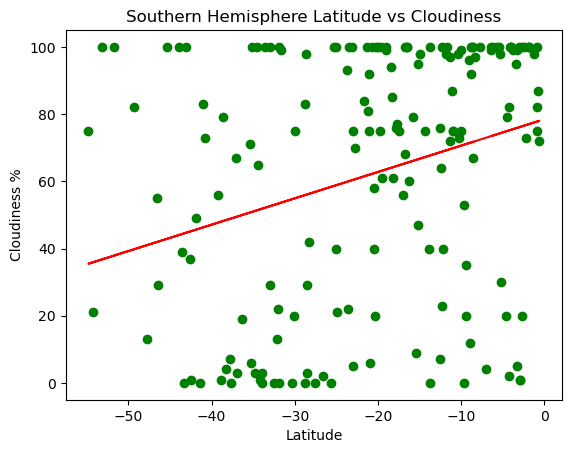

In [57]:
# Southern Hemisphere
plotLinReg(x = southern_hemi_df["Lat"], y = southern_hemi_df["Cloudiness"], title = "Southern Hemisphere Latitude vs Cloudiness", xlabel = "Latitude", ylabel = "Cloudiness %", xyloc= (50, 20))

**Discussion about the linear relationship:** The Northern Hemisphere has a very weak positve to no correlation between Latitude and Cloudiness. The Southern Hemisphere has a weak positve correlation between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.12626877239137263


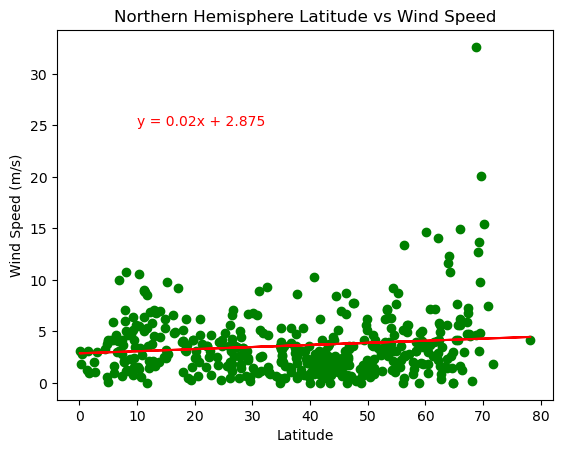

In [59]:
# Northern Hemisphere
plotLinReg(x = northern_hemi_df["Lat"], y = northern_hemi_df["Wind Speed"], title = "Northern Hemisphere Latitude vs Wind Speed", xlabel = "Latitude", ylabel = "Wind Speed (m/s)", xyloc= (10, 25))

The r value is -0.35693678904616


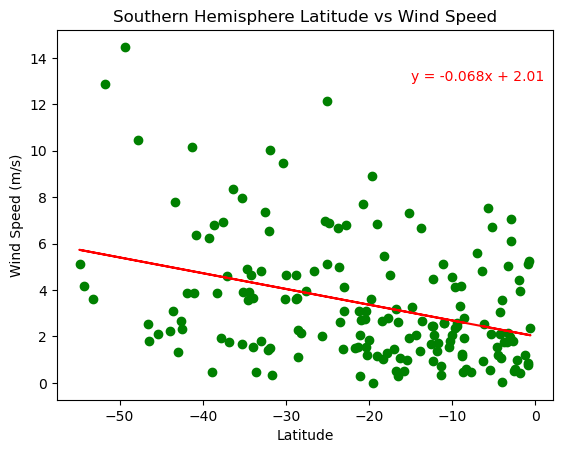

In [61]:
# Southern Hemisphere
plotLinReg(x = southern_hemi_df["Lat"], y = southern_hemi_df["Wind Speed"], title = "Southern Hemisphere Latitude vs Wind Speed", xlabel = "Latitude", ylabel = "Wind Speed (m/s)", xyloc= (-15, 13))

**Discussion about the linear relationship:** The Northern Hemisphere has very weak to no correltion between latitude and Wind Speed. Whereas the Southern Hemisphere has a samll negative correlation between Latitude and Wind Speed.